# CSE4224 Project 2
#### Grant Butler | gbutler2020@my.fit.edu

#### Data Retrieval/Cleaning:
Here, I will use the Spotify API to get the audio features of the tracks in my library, and create a cleaned pandas dataframe to be used with PCA and t-SNE after.

In [1]:
# connect to spotify api

from dotenv import dotenv_values
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# use dotenv to import api creds
secrets = dotenv_values(".env")

# making authentication manager for spotipy to communicate with spotify
auth_manager = SpotifyClientCredentials(client_id=secrets["SPOTIPY_CLIENT_ID"],
                                        client_secret=secrets["SPOTIPY_CLIENT_SECRET"])


sp = spotipy.Spotify(auth_manager=auth_manager)  # making spotipy object
sp.trace = False  # no debugging needed

In [2]:
# getting track ids from playlist

# grabbing the track ids and adding them to an array passed into them
def show_tracks(results, uriArray):
    for i, item in enumerate(results['items']):
        track = item['track']
        uriArray.append(track['id'])

# taking in the tracks from the playlist and grabbing the ids before returning them to a list
def get_playlist_track_ids(username, playlist_id):
    track_ids = []  # to store track ids
    playlist = sp.user_playlist(username, playlist_id)  # get playlist
    tracks = playlist['tracks']  # getting tracks from playlist

    # loop through the tracks and append them with helper function
    while tracks['next']:
        tracks = sp.next(tracks)
        show_tracks(tracks, track_ids)
    return track_ids


track_ids = get_playlist_track_ids(secrets['SPOTIFY_USERNAME'],
                                   secrets['PLAYLIST_ID'])

print(track_ids)

['6L8C8fJ9ajR01ODnO5LHsB', '7khJkFZx6OzNkHK2qbZTrX', '1EA40FX9aBaKIXwIp83WzL', '7e8utCy2JlSB8dRHKi49xM', '2Y906W0mkDUJBrnhsGz6ZY', '4PPSZf5D7lc36EGzZ4HO3p', '3Qhd1AlYFEYtU1L66gMWNL', '66muI4t7sDAeY8vF2vzT3B', '3ibni3TQ1M9S8tciqbXU4I', '600uAlmfRmnPG7b2whsVTI', '2JG9Gdo54L72gepntVPZQ4', '6d4FWjx72iuRWzn1HwywLK', '6TorufIR9E06RXo3VhZaae', '5hS8s1Vf4CeSRBT1bTWa39', '2VBYFWgwIlJjyzidPTHQqp', '1MD2yGSeBRALkMui1fZ05P', '24np6zeKNIU28oY3CAvQCh', '1cFOxSwrXWZQimUzqxdCIc', '3uK81IbKrK2xfLcjjCJDEE', '5CmS51r1fe8ZOqMYvpD7ni', '1szwDbVdIdoQq5mG5GXAmJ', '6Fe3Flc9SjE03pqwD6PVQl', '6k696WC7KR1j01mf7WqDzn', '70nzhMwX62mxBm0VwFFQbk', '3pecdrUzTZjaqrw6iCLTvd', '5dRQUolXAVX3BbCiIxmSsf', '1oYYd2gnWZYrt89EBXdFiO', '2Xb6wJYGi0QXwURw5WWvI5', '3qhlB30KknSejmIvZZLjOD', '3Zje70mXjYyMuzge8j24L9', '1F5A4LpF8ylUVtPoMAvNvn', '5KFyMWdNeEi5zGdrdXqofa', '19VZHcvZzCiSu7AqsImPRF', '0Z57YWES04xGh3AImDz6Qr', '1ZP4Qxb7USL3EezbxfpOVF', '6lVMcnULyl94wDrZ2HAuCT', '3azlo5j5KZPq3qlFlGSDiH', '40j1g78vr4poopRzoVWbAq', '1b3UY0WcVk

In [3]:
import json

# helper function to split up the bigger list of track ids (spotify api limits to 100 tracks)
def chunks(lst, n):
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

# taking in a chunk at a time, ensuring they are strings, and then adding on the features and returning them
def get_audio_features(track_ids):
    audio_features = []
    for chunk in chunks(track_ids, 100):
        chunk = [str(track_id) for track_id in chunk]
        audio_features.extend(sp.audio_features(chunk))
    return audio_features

audio_features = get_audio_features(track_ids)
print(json.dumps(audio_features, indent=2))

[
  {
    "danceability": 0.626,
    "energy": 0.562,
    "key": 9,
    "loudness": -5.891,
    "mode": 1,
    "speechiness": 0.0533,
    "acousticness": 0.000478,
    "instrumentalness": 1.28e-06,
    "liveness": 0.0818,
    "valence": 0.562,
    "tempo": 150.115,
    "type": "audio_features",
    "id": "6L8C8fJ9ajR01ODnO5LHsB",
    "uri": "spotify:track:6L8C8fJ9ajR01ODnO5LHsB",
    "track_href": "https://api.spotify.com/v1/tracks/6L8C8fJ9ajR01ODnO5LHsB",
    "analysis_url": "https://api.spotify.com/v1/audio-analysis/6L8C8fJ9ajR01ODnO5LHsB",
    "duration_ms": 149468,
    "time_signature": 4
  },
  {
    "danceability": 0.62,
    "energy": 0.825,
    "key": 11,
    "loudness": -4.885,
    "mode": 0,
    "speechiness": 0.0531,
    "acousticness": 0.116,
    "instrumentalness": 1.25e-05,
    "liveness": 0.623,
    "valence": 0.749,
    "tempo": 150.968,
    "type": "audio_features",
    "id": "7khJkFZx6OzNkHK2qbZTrX",
    "uri": "spotify:track:7khJkFZx6OzNkHK2qbZTrX",
    "track_href": 

In [4]:
import pandas as pd

# ensuring there are no entries without data
cleaned_features = [item for item in audio_features if item is not None]

# making dataframe from the list of dicts
df = pd.DataFrame(cleaned_features)

# remove fields that have no bearing on analysis
fields_to_remove = ["analysis_url", "track_href", "type", "uri"]
df = df.drop(columns=fields_to_remove)

print(df)

      danceability  energy  key  loudness  mode  speechiness  acousticness  \
0            0.626   0.562    9    -5.891     1       0.0533      0.000478   
1            0.620   0.825   11    -4.885     0       0.0531      0.116000   
2            0.632   0.375    4   -12.115     0       0.0274      0.793000   
3            0.646   0.813    6    -5.290     0       0.0288      0.001780   
4            0.869   0.522    6    -5.477     0       0.0567      0.256000   
...            ...     ...  ...       ...   ...          ...           ...   
2625         0.714   0.654    5    -6.868     0       0.3160      0.385000   
2626         0.826   0.553    5    -9.303     1       0.3160      0.432000   
2627         0.839   0.741    7    -7.270     1       0.0379      0.029400   
2628         0.559   0.640   11    -7.022     0       0.1240      0.160000   
2629         0.488   0.830    7    -5.331     1       0.0436      0.001270   

      instrumentalness  liveness  valence    tempo             

#### PCA Dimensional Reduction:

Using PCA, I hope to reduce the number of dimensions that t-SNE needs to work with.

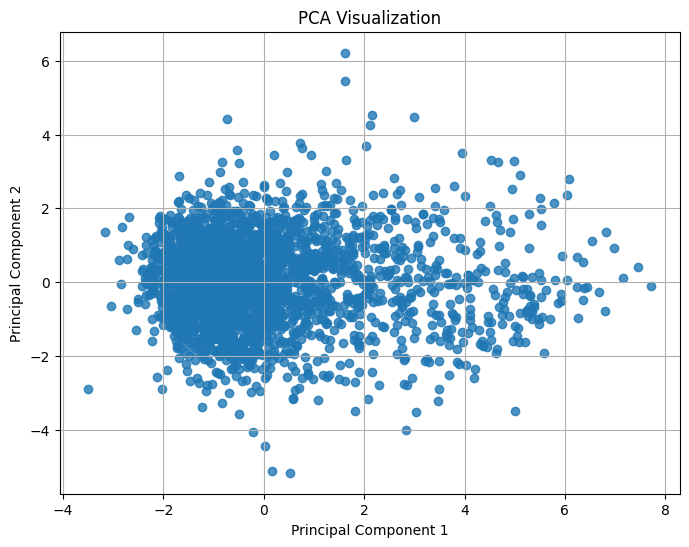

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# remove ids for numeric data only
df_numeric = df.drop(columns='id')

# use standard scaler to centeralize and normalize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric)

# apply PCA
pca = PCA(n_components=2) # only 2 dimensions for visualization
X_pca = pca.fit_transform(X_scaled)

# visualize PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.8)
plt.title('PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# Visualize PCA in 3D
# fig = plt.figure(figsize=(8, 6))
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], alpha=0.8)
# ax.set_title('PCA Visualization in 3D')
# ax.set_xlabel('Principal Component 1')
# ax.set_ylabel('Principal Component 2')
# ax.set_zlabel('Principal Component 3')
# plt.grid(True)
# plt.show()

In [6]:
# checking loadings of principal components
loadings = pca.components_

loadings_df = pd.DataFrame(loadings, columns=df_numeric.columns)

print(loadings_df)

   danceability    energy       key  loudness      mode  speechiness  \
0     -0.301963 -0.453391 -0.009907 -0.489232  0.049646    -0.142933   
1      0.479646 -0.257766  0.048704 -0.149893  0.047053     0.417145   

   acousticness  instrumentalness  liveness   valence     tempo  duration_ms  \
0      0.378745          0.358715 -0.106439 -0.290033 -0.155605    -0.122367   
1      0.247029         -0.191394 -0.116804  0.398691 -0.121244    -0.458517   

   time_signature  
0       -0.184813  
1       -0.085099  


Principal Component 1: Explained Variance Ratio = 0.2376
Principal Component 2: Explained Variance Ratio = 0.1062


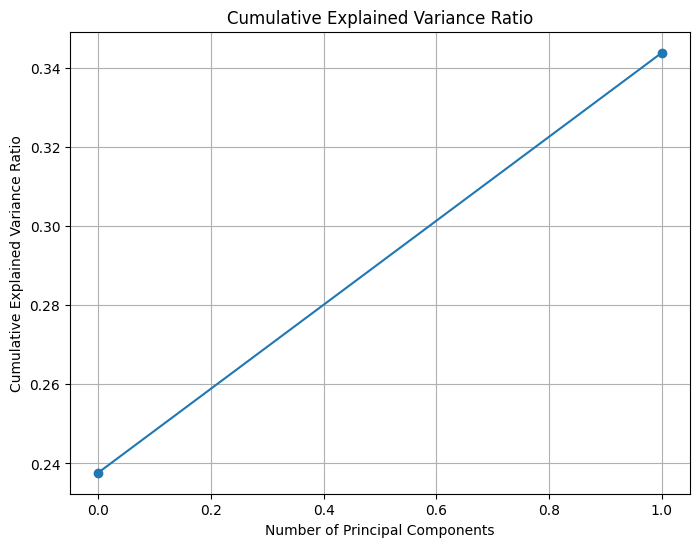

In [7]:
import numpy as np

# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Print the explained variance ratio for each component
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Principal Component {i + 1}: Explained Variance Ratio = {ratio:.4f}")

# Plot the cumulative explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(explained_variance_ratio), marker='o', linestyle='-')
plt.title('Cumulative Explained Variance Ratio')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

In [8]:


# sort the loadings to be the most impactful first

loadings_diff = np.abs(np.diff(loadings, axis=0))
loadings_diff_sum = loadings_diff.sum(axis=0)
loadings_diff_df = pd.DataFrame(
    loadings_diff_sum, index=df_numeric.columns, columns=['Sum of Loadings Diff'])

loadings_diff_sorted = loadings_diff_df.sort_values(by='Sum of Loadings Diff', ascending=False)

print(loadings_diff_sorted)

                  Sum of Loadings Diff
danceability                  0.781609
valence                       0.688724
speechiness                   0.560078
instrumentalness              0.550109
loudness                      0.339339
duration_ms                   0.336150
energy                        0.195625
acousticness                  0.131716
time_signature                0.099714
key                           0.058611
tempo                         0.034361
liveness                      0.010365
mode                          0.002594


#### Apply t-SNE on PCA Data

Using *t*-SNE on data from PCA.

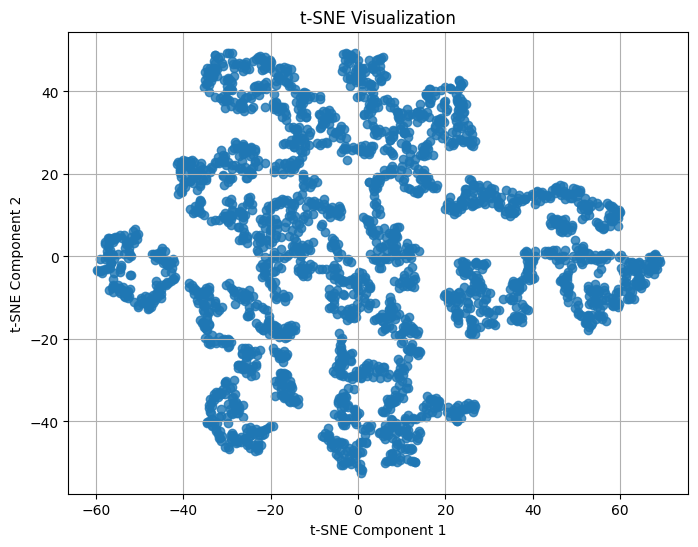

In [9]:
from sklearn.manifold import TSNE

# using 2 components for t-SNE for visualization after reducing with PCA
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_pca)

# t-SNE results
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], alpha=0.8)
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(True)
plt.show()

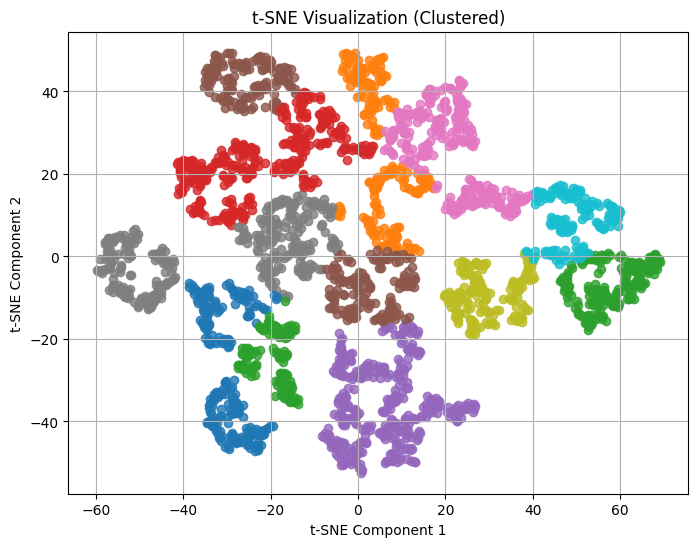

In [10]:
# using k-means to group the clusters and color them based on that

from sklearn.cluster import KMeans

# apply k-means to t-SNE results
kmeans = KMeans(n_clusters=18, random_state=523)
clusters = kmeans.fit_predict(X_tsne)

plt.figure(figsize=(8, 6))
for cluster_id in range(len(np.unique(clusters))):
    cluster_indices = np.where(clusters == cluster_id)[0]
    plt.scatter(X_tsne[cluster_indices, 0], X_tsne[cluster_indices,
                1], label=f'Cluster {cluster_id}', alpha=0.8)
plt.title('t-SNE Visualization (Clustered)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
# plt.legend() # legends for whether you see which cluster is which
plt.grid(True)
plt.show()

In [11]:
# exporting the track ids with cluster information 
cluster_track_ids = {}
clusters = clusters.astype(int)
cluster_track_ids = [{'track_id': track_id, 'cluster_label': int(cluster_label)}
                     for track_id, cluster_label in zip(track_ids, clusters)]

with open('clustered_track_ids.json', 'w') as f:
    json.dump(cluster_track_ids, f, indent=4)